In [1]:
import random
import statistics
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from matplotlib import pyplot as pyplot

## Data Preprocessing

In [2]:

new_data = { 1:1,
     2:2,
     3:3,
     4:2,
     5:3,
     6:3,
     7:1,
     8:2}
dataset= pd.read_csv("./Temporal_Data.csv", low_memory=False)
dataset['EXAMDATE'] = pd.to_datetime(dataset['EXAMDATE'])
sort_dataset = dataset.sort_values(by=['RID','EXAMDATE']).copy()
important_feat = ['APOE4', 'AGE', 'PTEDUCAT', 'ADAS11_bl', 'ADAS13_bl', 'CDRSB_bl',
'MMSE_bl', 'RAVLT_immediate_bl', 'RAVLT_learning_bl',
'RAVLT_forgetting_bl', 'RAVLT_perc_forgetting_bl', 'FAQ_bl',
'Ventricles_bl', 'Hippocampus_bl', 'WholeBrain_bl', 'Entorhinal_bl',
'Fusiform_bl', 'MidTemp_bl', 'ICV_bl', 'FDG_bl'] 
label_name= "DXCHANGE"
filter_dataset1 = sort_dataset[important_feat].copy()
scaler = MinMaxScaler()
scaler.fit(filter_dataset1)
scaled =  scaler.fit_transform(filter_dataset1)
filter_dataset = pd.DataFrame(scaled, columns=filter_dataset1.columns, index=filter_dataset1.index)
filter_dataset.interpolate(method='linear',inplace=True)
label_data = sort_dataset[["RID",label_name]].copy()
print(label_data[~(label_data["RID"].isnull())].shape)
label_data[label_name]= label_data.groupby("RID").transform(lambda x: x.fillna(method="ffill"))
null_index = label_data[label_data["DXCHANGE"].isnull()].index
label_data = label_data[~(label_data.index.isin(null_index))].copy()
filter_dataset = filter_dataset[~(filter_dataset.index.isin(null_index))].copy()
feat_values = [list(i) for i in filter_dataset.values]
feat_dataframe =  pd.DataFrame()
feat_dataframe["feat"]= feat_values
feat_dataframe["RID"]= label_data["RID"]
datasequence = feat_dataframe.groupby('RID')['feat'].apply(list).reset_index(name='sequence')
tmp = label_data.groupby("RID")[label_name].apply(list).reset_index(name='class_label_encoded_seq')
assert tmp.shape== datasequence.shape


# print(label_data, end ="\n\n")

label_data1 = label_data.replace({"DXCHANGE":new_data})
one_hot_encoded_label = pd.get_dummies(label_data1, columns = [label_name])
one_hot_encoded_label_list = [list(i) for i in one_hot_encoded_label[one_hot_encoded_label.columns[1:]].values]
print(len(one_hot_encoded_label_list))
print(label_data1.shape)
label_data1["class_label_encoded"] = one_hot_encoded_label_list
labelsequence =  label_data1.groupby("RID")["class_label_encoded"].apply(list).reset_index(name='class_label_encoded_seq')
assert np.all(tmp["RID"]== datasequence["RID"])
assert np.all(tmp["RID"]== labelsequence["RID"])
labelsequence["length"]= labelsequence["class_label_encoded_seq"].apply(lambda x: len(x))
datasequence=datasequence.copy()
labelsequence= labelsequence.copy()

(12741, 2)
12734
(12734, 2)


In [3]:
labelsequence.columns

Index(['RID', 'class_label_encoded_seq', 'length'], dtype='object')

In [4]:
datasequence['len']=datasequence['sequence'].apply(lambda x : len(x))

In [5]:
datasequence.columns

Index(['RID', 'sequence', 'len'], dtype='object')

In [6]:
for i,j in zip(labelsequence.values, datasequence.values):
    if i[-1]!=j[-1]:
        print(i[0], j[0])
        print(i[-1],j[-1])

2079 2079.0
12 11
2380 2380.0
11 10
4167 4167.0
10 9
4199 4199.0
10 9
4512 4512.0
8 7
4556 4556.0
8 7
4557 4557.0
9 8


In [7]:
sort_dataset[sort_dataset["RID"]==2380.0]["DXCHANGE"]

5421     2.0
3373     NaN
9370     2.0
3374     2.0
9371     NaN
9372     2.0
9373     NaN
11389    2.0
12038    2.0
12704    2.0
12740    NaN
Name: DXCHANGE, dtype: float64

In [8]:
def get_data():
    new_data = { 1:1,
         2:2,
         3:3,
         4:2,
         5:3,
         6:3,
         7:1,
         8:2}
    dataset= pd.read_csv("./Temporal_Data.csv", low_memory=False)
    dataset['EXAMDATE'] = pd.to_datetime(dataset['EXAMDATE'])
    sort_dataset = dataset.sort_values(by=['RID','EXAMDATE']).copy()
    important_feat = ['APOE4', 'AGE', 'PTEDUCAT', 'ADAS11_bl', 'ADAS13_bl', 'CDRSB_bl',
    'MMSE_bl', 'RAVLT_immediate_bl', 'RAVLT_learning_bl',
    'RAVLT_forgetting_bl', 'RAVLT_perc_forgetting_bl', 'FAQ_bl',
    'Ventricles_bl', 'Hippocampus_bl', 'WholeBrain_bl', 'Entorhinal_bl',
    'Fusiform_bl', 'MidTemp_bl', 'ICV_bl', 'FDG_bl'] 
    label_name= "DXCHANGE"
    filter_dataset1 = sort_dataset[important_feat].copy()
    scaler = MinMaxScaler()
    scaler.fit(filter_dataset1)
    scaled =  scaler.fit_transform(filter_dataset1)
    filter_dataset = pd.DataFrame(scaled, columns=filter_dataset1.columns, index=filter_dataset1.index) #small change
    filter_dataset.interpolate(method='linear',inplace=True)
    label_data = sort_dataset[["RID",label_name]].copy()
    print(label_data[~(label_data["RID"].isnull())].shape)
    label_data[label_name]= label_data.groupby("RID").transform(lambda x: x.fillna(method="ffill"))
    null_index = label_data[label_data["DXCHANGE"].isnull()].index
    label_data = label_data[~(label_data.index.isin(null_index))].copy()
    filter_dataset = filter_dataset[~(filter_dataset.index.isin(null_index))].copy()
    feat_values = [list(i) for i in filter_dataset.values]
    feat_dataframe =  pd.DataFrame()
    feat_dataframe["feat"]= feat_values
    feat_dataframe["RID"]= label_data["RID"]
    datasequence = feat_dataframe.groupby('RID')['feat'].apply(list).reset_index(name='sequence')
    tmp = label_data.groupby("RID")[label_name].apply(list).reset_index(name='class_label_encoded_seq')
    assert tmp.shape== datasequence.shape
    

    # print(label_data, end ="\n\n")

    label_data1 = label_data.replace({"DXCHANGE":new_data})
    one_hot_encoded_label = pd.get_dummies(label_data1, columns = [label_name])
    one_hot_encoded_label_list = [list(i) for i in one_hot_encoded_label[one_hot_encoded_label.columns[1:]].values]
    print(len(one_hot_encoded_label_list))
    print(label_data1.shape)
    label_data1["class_label_encoded"] = one_hot_encoded_label_list
    labelsequence =  label_data1.groupby("RID")["class_label_encoded"].apply(list).reset_index(name='class_label_encoded_seq')
    assert np.all(tmp["RID"]== datasequence["RID"])
    assert np.all(tmp["RID"]== labelsequence["RID"])
    labelsequence["length"]= labelsequence["class_label_encoded_seq"].apply(lambda x: len(x))
    datasequence=datasequence.copy()
    labelsequence= labelsequence.copy()
    return datasequence, labelsequence

In [9]:
datasequence, labelsequence = get_data()

(12741, 2)
12734
(12734, 2)


In [10]:
def data_aug2(datasequence,labelsequence, window_size=12, stride=1):
    x_trainn=[]
    y_trainn=[]
    x_testt=[]
    y_testt=[]
    datasequence  = datasequence.copy()
    labelsequence = labelsequence.copy()
    X_train, X_test, y_train, y_test = train_test_split(datasequence["sequence"], labelsequence["class_label_encoded_seq"], random_state = 3, test_size=0.10)
    for x,y in zip(X_train, y_train):
        if len(x) and len(y) > window_size:
            for i in range(0,len(x)-window_size+1,stride):
                x_trainn.append(x[i:window_size+i])
                y_trainn.append(y[i:window_size+i])
        else:
            x_trainn.append((window_size-len(x))*[x[0]]+x)
            y_trainn.append((window_size-len(y))*[y[0]]+y)
    for x,y in zip(X_test, y_test):
        if len(x) and len(y) > window_size:
            for i in range(0,len(x)-window_size+1,stride):
                x_testt.append(x[i:window_size+i])
                y_testt.append(y[i:window_size+i])
        else:
            x_testt.append((window_size-len(x))*[x[0]]+x)
            y_testt.append((window_size-len(y))*[y[0]]+y) #small change
    #print(len(y_trainn[0]))
    x_trainn = np.array([np.array([np.array(feat) for feat in temp]) for temp in x_trainn])
    y_trainn = np.array([np.array([np.array(feat) for feat in temp]) for temp in y_trainn])
    x_testt  = np.array([np.array([np.array(feat) for feat in temp]) for temp in x_testt])
    y_testt  = np.array([np.array([np.array(feat) for feat in temp]) for temp in y_testt])
    #print(y_trainn.shape)
    Xtrain_enc, y_train_decoder, y_train = x_trainn, y_trainn[:,0:-1,:], y_trainn[:,1:,:]
    X_test_enc, y_test_decoder, y_test = x_testt, y_testt[:,0:-1,:], y_testt[:,1:,:]
    return Xtrain_enc, y_train_decoder, y_train, X_test_enc, y_test_decoder, y_test

In [11]:
#     Xtrain_enc, y_train_decoder, y_train = x_trainn, y_trainn[:,0:-1,:], y_trainn[:,1:,:]
#     X_test_enc, y_test_decoder, y_test = x_testt, y_testt[:,0:-1,:], y_testt[:,1:,:]
#     return Xtrain_enc, y_train_decoder, y_train, X_test_enc, y_test_decoder, y_test

In [12]:
datasequence, labelsequence = get_data()

(12741, 2)
12734
(12734, 2)


In [13]:
Xtrain_enc, y_train_decoder, y_train, X_test_enc, y_test_decoder, y_test=data_aug2(datasequence,labelsequence, window_size=12, stride=1)

In [14]:
repeat_index= 3

In [15]:
Xtrain_enc.shape

(2314, 12, 20)

In [16]:
repeat_till=Xtrain_enc.shape[1]-repeat_index-1

In [17]:
repeat_till

8

In [18]:
c_Xtrain_enc=Xtrain_enc.copy()

In [19]:
tmp1 = np.repeat(Xtrain_enc[:, repeat_index, :], repeat_till, axis=0).reshape(-1,repeat_till,20)
Xtrain_enc[:,repeat_index+1:,:]=tmp1

tmp2 = np.repeat(X_test_enc[:, repeat_index, :], repeat_till, axis=0).reshape(-1,repeat_till,20)
X_test_enc[:,repeat_index+1:,:]=tmp2

In [20]:
c_Xtrain_enc[1,3,:]

array([0.        , 0.71891892, 1.        , 0.47644715, 0.59136638,
       0.25      , 0.75      , 0.36619718, 0.4375    , 0.55      ,
       1.        , 0.4       , 0.45629369, 0.23836462, 0.2005875 ,
       0.04071588, 0.19237559, 0.22604541, 0.39044176, 0.2363111 ])

In [21]:
c_Xtrain_enc[20,2,:]==Xtrain_enc[20,11,:]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [22]:
len(Xtrain_enc)

2314

In [23]:
len(y_train_decoder)

2314

In [24]:
Xtrain_enc.shape, y_train_decoder.shape, y_train.shape

((2314, 12, 20), (2314, 11, 3), (2314, 11, 3))

In [25]:
X_test_enc.shape, y_test_decoder.shape, y_test.shape

((238, 12, 20), (238, 11, 3), (238, 11, 3))

## Model Training

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.optimizers import SGD, Adam, RMSprop

2023-09-23 16:09:44.996562: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-23 16:09:45.822577: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-23 16:09:45.822710: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-09-23 16:09:47.775574: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

In [27]:
num_class  =  y_test.shape[2]
latent_dim =  64
seq_len    =  y_train.shape[1]

In [28]:
encoder_inputs= layers.Input(shape=(Xtrain_enc.shape[1],Xtrain_enc.shape[2]))

# Return states in addition to output
encoder_lstm = layers.LSTM(latent_dim, return_state=True, return_sequences=True, name="encoder")#return_sequences=True
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
encoder_states = [state_h, state_c]
print(encoder_outputs.shape)

decoder_inputs = layers.Input(shape=(None,y_train.shape[2]))
decoder_lstm  = layers.LSTM(latent_dim, return_state=True,return_sequences=True, name="decoder")#recurrent_dropout=0.2 #return_sequences=True
decoder_outputs, _, _  = decoder_lstm(decoder_inputs, initial_state=encoder_states,)
#reshape_h = layers.Reshape((1,128))(state_h)
concat_layer = layers.Concatenate(name="concatenate")
decoder_outputs = concat_layer([decoder_outputs,encoder_outputs[:,1:,:]])

print(decoder_outputs.shape)
#dense1 =  layers.Dense(64, activation='relu')
decoder_dense =  layers.Dense(num_class,  activation='softmax', name="output")
#output = dense1(output)

decoder_outputs = decoder_dense(decoder_outputs)

model = keras.Model([encoder_inputs,decoder_inputs], decoder_outputs)

2023-09-23 16:09:50.499565: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-23 16:09:50.509595: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-09-23 16:09:50.509716: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-09-23 16:09:50.511080: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-09-23 16:09:50.511307: W tensorfl

(None, 12, 64)
(None, 11, 128)


In [29]:
y_train.shape

(2314, 11, 3)

In [30]:
encoder_outputs.shape

TensorShape([None, 12, 64])

In [31]:
print (encoder_outputs.shape)
print(state_h.shape)
print(state_c.shape)

(None, 12, 64)
(None, 64)
(None, 64)


In [32]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 12, 20)]     0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None, 3)]    0           []                               
                                                                                                  
 encoder (LSTM)                 [(None, 12, 64),     21760       ['input_1[0][0]']                
                                 (None, 64),                                                      
                                 (None, 64)]                                                      
                                                                                              

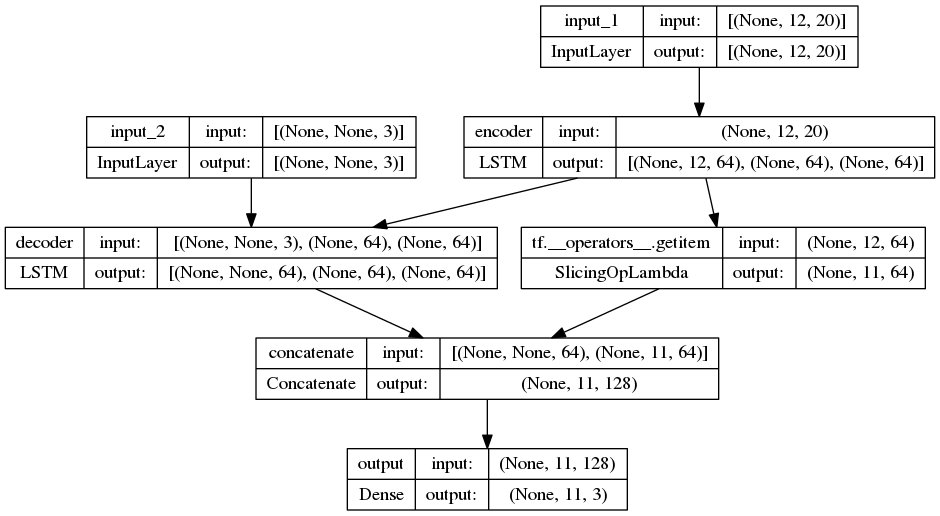

In [33]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [34]:
# opt = Adam(learning_rate=0.001)
# model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [35]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)# new line added

In [36]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy')# new line added

In [37]:
opt = RMSprop(learning_rate=0.001)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [38]:
history = model.fit([Xtrain_enc, y_train_decoder], y_train,validation_split=0.20, epochs=50, verbose=1, batch_size=100)# validation_data=([X_test_enc, y_test_decoder], y_test)

Epoch 1/50
19/19 [==============================] - 10s 145ms/step - loss: 0.8859 - accuracy: 0.6676 - val_loss: 0.6139 - val_accuracy: 0.8396
Epoch 2/50
19/19 [==============================] - 1s 34ms/step - loss: 0.5561 - accuracy: 0.8449 - val_loss: 0.4437 - val_accuracy: 0.8830
Epoch 3/50
19/19 [==============================] - 1s 43ms/step - loss: 0.4357 - accuracy: 0.8867 - val_loss: 0.3618 - val_accuracy: 0.9193
Epoch 4/50
19/19 [==============================] - 1s 45ms/step - loss: 0.3712 - accuracy: 0.9087 - val_loss: 0.3274 - val_accuracy: 0.9030
Epoch 5/50
19/19 [==============================] - 1s 53ms/step - loss: 0.3186 - accuracy: 0.9165 - val_loss: 0.2633 - val_accuracy: 0.9274
Epoch 6/50
19/19 [==============================] - 1s 48ms/step - loss: 0.2860 - accuracy: 0.9264 - val_loss: 0.2324 - val_accuracy: 0.9493
Epoch 7/50
19/19 [==============================] - 1s 41ms/step - loss: 0.2559 - accuracy: 0.9360 - val_loss: 0.2179 - val_accuracy: 0.9501
Epoch 8/50


Train accuracy: 0.9664492607116699, Validation accuracy: 0.9579831957817078


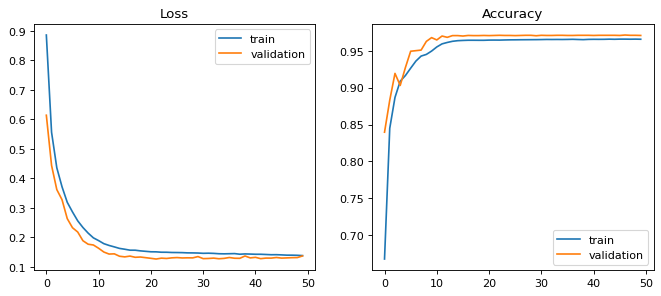

In [39]:
# evaluate the model
_, train_acc = model.evaluate([Xtrain_enc, y_train_decoder], y_train, verbose=0)
_, test_acc = model.evaluate([X_test_enc, y_test_decoder], y_test, verbose=0)
print(f"Train accuracy: {train_acc}, Validation accuracy: {test_acc}")
# plot loss during training
pyplot.figure(figsize=(10, 4), dpi=80)
pyplot.subplot(121)
pyplot.title('Loss')
pyplot.plot(history.history['loss'],     label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(122)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='validation')
pyplot.legend()
pyplot.show()

In [40]:
#feature_data_np.shape[1]

In [41]:
#encoder_inputs = layers.Input(shape=(feature_data_np.shape[1],feature_data_np.shape[2]))
encoder_outputs, enc_state_h, enc_state_c = encoder_lstm(encoder_inputs)
encoder_model = Model(encoder_inputs, [encoder_outputs, enc_state_h, enc_state_c])

decoder_state_input_h  = layers.Input(shape=(latent_dim,))
decoder_state_input_c  = layers.Input(shape=(latent_dim,))
encoder_decoder_inputs = layers.Input(shape=(None,latent_dim))

decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
#decoder_states_inputs = [enc_state_h, enc_state_c]
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs1 = concat_layer([decoder_outputs, encoder_decoder_inputs])
decoder_outputs = decoder_dense(decoder_outputs1)
decoder_model = Model(
    [decoder_inputs,encoder_decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

In [42]:
num_ip_infer= 5

In [43]:
def decode_sequence(input_seq, test_input, seq_len):
    # Encode the input as state vectors.
    encoder_outputs, enc_state_h, enc_state_c = encoder_model.predict(tf.expand_dims(input_seq, axis=0),verbose=0)
    #print(encoder_outputs[:,0,:].reshape(1,1,128).shape)
    states_value = [enc_state_h, enc_state_c]
    
    target_seq   = test_input[None,:,:]
    #rint(target_seq.shape)
  
    stop_condition   = False
    decoded_sentence = []
    assert num_ip_infer < seq_len
    i=1
    enc_dec_input = encoder_outputs[:,i:i+num_ip_infer,:].reshape(1,num_ip_infer,latent_dim)
#         print(enc_dec_input.shape)
    output_tokens, h, c = decoder_model.predict(
            [target_seq,enc_dec_input] + states_value, verbose=0)
    index = np.argmax(output_tokens[:,-1,:])
    target_seq = np.zeros((1, 1, num_class))
    target_seq[0, 0, index] = 1
        #print(target_seq)
    i=i+num_ip_infer

        # Update states
    states_value = [h, c]
    decoded_sentence.append(target_seq[0,0,:])
    
    while not stop_condition:
        enc_dec_input = encoder_outputs[:,i,:].reshape(1,1,latent_dim)
#         print(enc_dec_input.shape)
        output_tokens, h, c = decoder_model.predict(
            [target_seq,enc_dec_input] + states_value, verbose=0)
        #print("op",output_tokens.shape)
        
        index = np.argmax(output_tokens)
        # Exit condition: either hit max length
        # or find stop character.
        if len(decoded_sentence)+1 >= seq_len-(num_ip_infer-1):
            stop_condition = True

        # Update the target sequence (of length 1).
        
        #print(index)
        
        target_seq = np.zeros((1, 1, num_class))
        target_seq[0, 0, index] = 1
        #print(target_seq)
        i=i+1

        # Update states
        states_value = [h, c]
        decoded_sentence.append(target_seq[0,0,:])

    return np.array(decoded_sentence)

In [44]:
#  print(enc_dec_input.shape)

In [45]:
test_data_id = random.choice(range(X_test_enc.shape[0]))
print(f"Test data index: {test_data_id}")
test_data_ip = X_test_enc[test_data_id], y_test_decoder[test_data_id,0:num_ip_infer,:]

Test data index: 191


In [46]:
test_data_ip[1].shape

(5, 3)

In [47]:
y_test_decoder[125,0,:][None,None,:].shape

(1, 1, 3)

In [48]:
predicted_value = decode_sequence(*test_data_ip, seq_len)

In [49]:
predicted_value.shape

(7, 3)

In [50]:
y_test[test_data_id][num_ip_infer-1:,:].shape

(7, 3)

In [51]:
np.argmax(y_test[test_data_id][num_ip_infer-1:,:], axis=1)

array([2, 2, 2, 2, 2, 2, 2])

In [52]:
print(f"Output Correct: {np.all(predicted_value==y_test[test_data_id][num_ip_infer-1:,:])}")

Output Correct: True


In [53]:
#seq_len

In [54]:
predicted_index = []
actual_index    = []
for x,y_i,y in zip(X_test_enc, y_test_decoder, y_test):
    test_data_input = x, y_i[0:num_ip_infer,:]
    predicted_value = decode_sequence(*test_data_input, seq_len)
    predicted_index.append(np.argmax(predicted_value, axis=1))
    actual_index.append(np.argmax(y[num_ip_infer-1:,:], axis=1))

In [55]:
#actual_index

In [56]:
#predicted_index

In [57]:
accuracy = [1 if np.array_equal(p, a) else 0 for p, a in zip(predicted_index, actual_index)]

In [58]:
print(accuracy)

[1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [59]:
pd.value_counts(np.array(accuracy))

1    164
0     74
dtype: int64

In [60]:
round(sum(accuracy)/len(accuracy),2)

0.69

In [61]:
predicted_index[35]

array([1, 1, 1, 1, 1, 1, 1])

In [62]:
actual_index[35]

array([1, 1, 1, 1, 1, 1, 2])

In [63]:
# print(accuracy)

In [64]:
len(predicted_index)

238

In [65]:
len(actual_index)

238

In [66]:
X_test_enc.shape

(238, 12, 20)

In [67]:
y_test_decoder.shape

(238, 11, 3)

In [68]:
predicted_op = np.array(predicted_index)
actual_op    = np.array(actual_index)

In [69]:
acc = []
for i in range(seq_len-(num_ip_infer-1)):
    acc.append(np.sum(predicted_op[:,i]==actual_op[:,i])/predicted_op.shape[0])

In [70]:
np.sum(predicted_op[:,i]==1)

108

In [71]:
acc_1 = []

In [72]:
actual_op[0:10,:]

array([[1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2, 2, 2],
       [1, 1, 1, 2, 2, 2, 2],
       [1, 1, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 2, 2],
       [0, 0, 0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2, 2, 2]])

In [73]:
index = np.where(actual_op[:,1]==1)

In [74]:
index[0].shape[0]

107

In [75]:
np.where(predicted_op[:,1]==1)[0].shape

(108,)

In [76]:
predicted_op.shape

(238, 7)

In [77]:
acc = []
for i in range(seq_len-(num_ip_infer-1)):
    acc.append(np.sum(predicted_op[:,i]==actual_op[:,i])/predicted_op.shape[0])

In [78]:
acc

[0.9789915966386554,
 0.9285714285714286,
 0.8865546218487395,
 0.8445378151260504,
 0.8067226890756303,
 0.7436974789915967,
 0.6974789915966386]

In [79]:
print(" Average Test Accuracy: ", round((sum(acc[:]))/len(acc[:]),2))
print("Standard Deviation is % s "
                % (statistics.stdev(acc)))

 Average Test Accuracy:  0.84
Standard Deviation is 0.10003261277128825 


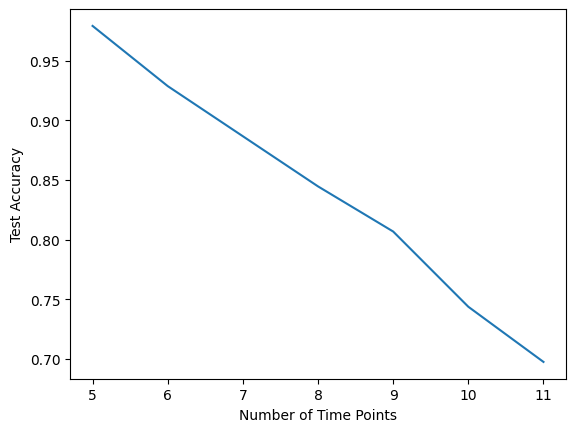

In [80]:
y = acc
x = range(num_ip_infer,seq_len+1)
#default_x_ticks = range(len(x))
plt.xlabel("Number of Time Points")
plt.ylabel("Test Accuracy")
plt.plot(x, y)
plt.xticks(x, x)
plt.show()

In [81]:
###############################################################################

In [82]:
#np.where(actual_op[:,i]==0)

In [83]:
acc1=[]
for j in range(0,3):
    temp=[]
    for i in range(seq_len-(num_ip_infer-1)):
        actual_index1 = np.where(actual_op[:,i]==j)
        temp.append(np.sum(predicted_op[actual_index1,i]==actual_op[actual_index1,i])/actual_index1[0].shape[0])
    acc1.append(temp)

In [84]:
acc1

[[0.9857142857142858,
  0.9558823529411765,
  0.9,
  0.8823529411764706,
  0.8656716417910447,
  0.8260869565217391,
  0.8153846153846154],
 [0.963963963963964,
  0.9252336448598131,
  0.900990099009901,
  0.8673469387755102,
  0.8478260869565217,
  0.810126582278481,
  0.76],
 [1.0,
  0.9047619047619048,
  0.8507462686567164,
  0.7777777777777778,
  0.7088607594936709,
  0.6222222222222222,
  0.5714285714285714]]

In [85]:
cn_acc = (np.sum(acc1[0]))/11
mci_acc = (np.sum(acc1[1]))/11
ad_acc = (np.sum(acc1[2]))/11

print("Average CN accuracy: ", cn_acc)
print("Average MCI accyracy:", mci_acc)
print("Average AD accuracy:", ad_acc)

Average CN accuracy:  0.5664629812299393
Average MCI accyracy: 0.5523170287131083
Average AD accuracy: 0.494163409485533


In [86]:
from matplotlib import pyplot as plt

In [87]:
# y = [acc1[0],acc1[1],acc1[2],acc]
# x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
# plt.plot(acc1[0], label="CN")
# plt.plot(acc1[1], label="MCI")
# plt.plot(acc1[2], label="AD")
# plt.plot(acc, label="Total Accuracy")
# plt.xlabel("Number of Time Points")
# plt.ylabel("Test Accuracy")

# default_x_ticks = range(len(x))
# plt.xticks(default_x_ticks, x)
# plt.legend()
# plt.show() 

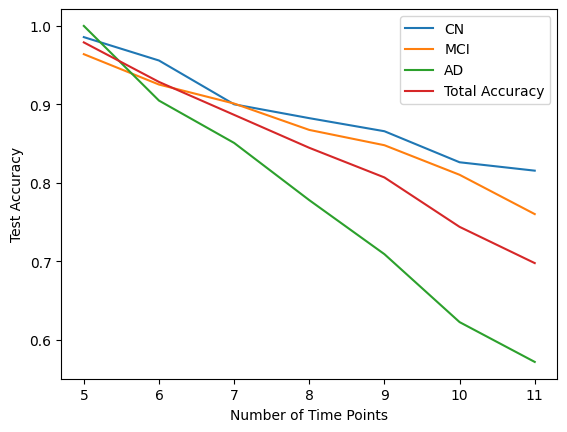

In [88]:
y = [acc1[0],acc1[1],acc1[2],acc]
x = range(num_ip_infer,seq_len+1)
plt.plot(x,y[0], label="CN")
plt.plot(x,y[1], label="MCI")
plt.plot(x,y[2], label="AD")
plt.plot(x,y[3], label="Total Accuracy")
plt.xlabel("Number of Time Points")
plt.ylabel("Test Accuracy")

#default_x_ticks = range(len(x))
plt.xticks(x, x)
plt.legend()
plt.show() 